In [1]:
from k6221 import *

In [2]:
rm = pyvisa.ResourceManager()
x = None

In [3]:
address = "TCPIP::10.0.4.138::1394::SOCKET"
dev = Keithley6221(address=address, rm=rm)

In [4]:
print(dev.get_idn())

*IDN?

KEITHLEY INSTRUMENTS INC.,MODEL 6221,4018989,D02  /700x 


In [45]:
dev.get_units()

<UNITS.Volts: 'V'>

In [50]:
dev.RunDeltaMeasurements(
            units=dev.UNITS.Ohms,
            current=1e-6,
            delay=10e-3,
            count="INF",
            swe_count=1,
    )

In [16]:
dev.WriteCommand("SOUR:SWE:ABOR")


In [42]:
dev.UNITS.Ohms

<UNITS.Ohms: 'OHMS'>

Trace actual size 65
Trace buffer free size 2095072,2080
Trace length: 130
Trace numbers:  [537.258789, 0.0, 534.846252, 0.031, 547.035461, 0.062, 540.252441, 0.093, 531.246338, 0.124, 530.842102, 0.154, 538.72406, 0.186, 547.073303, 0.216, 547.351196, 0.248, 547.464844, 0.278, 547.629089, 0.31, 546.643799, 0.34, 545.873291, 0.372, 546.340698, 0.402, 546.37854, 0.434, 546.517517, 0.464, 546.858582, 0.496, 547.186951, 0.526, 547.944824, 0.558, 548.26062, 0.588, 539.822937, 0.619, 531.107361, 0.65, 530.703186, 0.681, 538.711426, 0.712, 547.21228, 0.743, 539.583008, 0.773, 531.04425, 0.804, 530.589478, 0.835, 538.812439, 0.866, 547.389099, 0.897, 539.759766, 0.927, 531.018982, 0.958, 529.945313, 0.989, 538.206177, 1.02, 547.250183, 1.051, 539.658752, 1.082, 531.132629, 1.112, 530.463196, 1.143, 538.736633, 1.174, 547.464844, 1.205, 539.368225, 1.236, 530.905273, 1.267, 530.816895, 1.297, 539.204041, 1.329, 547.793335, 1.359, 539.633484, 1.39, 530.981079, 1.421, 530.640015, 1.451, 538.7998

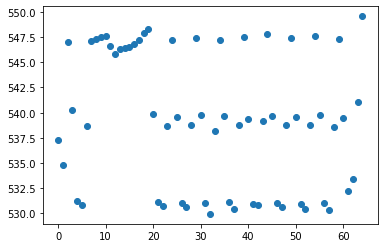

In [51]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)
print("Trace buffer free size", dev.get_trace_free_memory())
numbers = dev.get_trace_data()
print(f"Trace length: {len(numbers)}")
print(f"Trace numbers: ", numbers)
points = [numbers[2 * i] for i in range(count)]
# currents = [start_current + i * step_size for i in range(points.__len__())]
time_stamps = [numbers[2 * i + 1] for i in range(count)]
print(f"Trace data type: {dev.get_trace_data_type()}")
plt.plot(points, "o")
plt.show()

In [19]:
points

[30.5870953, 2.12869692, 2.11342716, 2.12531757]

In [29]:
rm.close()

In [41]:
dev.WriteCommand("SOUR:DCON:CABort OFF")

In [5]:
start_current = 0
stop_current=50e-6
step_size=10e-6
delay=2e-3
delta=20e-6
buffer_points = int((stop_current - start_current) / step_size + 1)
##############################################################################################
estimated_time = buffer_points * (delay) + 10
dev.RunDifferentialConductanceMeasurements(
    start_current=start_current,
    stop_current=stop_current,
    step_size=step_size,
    delay=delay,
    delta=delta,
    buffer_points=buffer_points
)
dev.AbortSWE()


SOUR:DCON:NVPR?

OUTP?

*RST

UNIT:VOLT:DC?

SOUR:DCON:STARt 0

SOUR:DCON:STAR?

And START_CURRENT =  0.000000E+00
SYST:ERR?

SOUR:DCON:STOP 5e-05

SOUR:DCON:STOP?

And STOP_CURRENT =  5.000000E-05
SYST:ERR?

SOUR:DCON:STEP 1e-05

SOUR:DCON:STEP?

And STEP =  1.000000E-05
SYST:ERR?

SOUR:DCON:DELTa 2e-05

SOUR:DCON:DELTa?

And DELTA =  0.00002
SYST:ERR?

SOUR:DCON:DELay 0.002

SOUR:DCON:DELay?

And DELAY =  0.00200
SYST:ERR?

SOUR:DCON:CAB OFF

SOUR:DCON:CAB?

And CAB =  0
SYST:ERR?

TRAC:POIN 6

SYST:ERR?

SOUR:DCON:ARM

SYST:ERR?

INIT:IMM

dIdV program is fully initialized!
SOUR:SWE:ABOR



Trace actual size 1
Trace buffer free size 2097120,32
Trace length: 2
Trace numbers:  [0.0106833, 0.0]
Trace data type: DCON


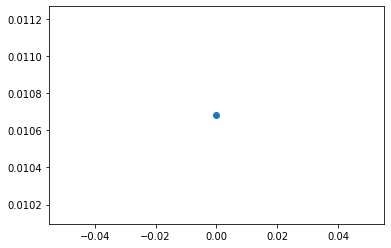

In [62]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)
print("Trace buffer free size", dev.get_trace_free_memory())
numbers = dev.get_trace_data()
print(f"Trace length: {len(numbers)}")
print(f"Trace numbers: ", numbers)
points = [numbers[2 * i] for i in range(count)]
currents = [start_current + i * step_size for i in range(points.__len__())]
time_stamps = [numbers[2 * i + 1] for i in range(count)]
print(f"Trace data type: {dev.get_trace_data_type()}")
plt.plot(currents, points, "o")
plt.show()

In [22]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)

Trace actual size 1


In [23]:
currents

[-1e-05]

In [32]:
dev.WriteCommand("SOUR:DCON:DELTa 1e-6")
dev.QueryCommand("SOUR:DCON:DELTa?")

'0.00000'

In [33]:
dev.QueryCommand(f"SOUR:DCON:STOP?")


'1.000000E-04'

In [37]:
dev.RunLinSweep(st=10e-6, en=100e-6, step=0.1e-6)

In [24]:
a="""*RST ‘ Restores 622x defaults.
SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.
SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.
SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.
SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.
SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.
SOUR:DCON:CAB ON ‘ Enables Compliance Abort.
TRAC:POIN 6 ‘ Sets buffer size to six points. A
SOUR:DCON:ARM ‘ Arms Differential Conductance.
INIT:IMM """

In [43]:
dev.WriteCommand("*RST")
dev.WriteCommand("SOUR:DCON:STARt 0 ")
dev.WriteCommand("SOUR:DCON:STEP 10e-6")
dev.WriteCommand("SOUR:DCON:STOP 50e-6")
dev.WriteCommand("SOUR:DCON:DELTa 20e-6 ")
dev.WriteCommand("SOUR:DCON:DELay 1e-3")
dev.WriteCommand("SOUR:DCON:CAB OFF")
dev.WriteCommand("TRAC:POIN 6")
dev.WriteCommand("SOUR:DCON:ARM")
dev.WriteCommand("INIT:IMM")

In [22]:
a

'*RST ‘ Restores 622x defaults.SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.SOUR:DCON:CAB ON ‘ Enables Compliance Abort.TRAC:POIN 6 ‘ Sets buffer size to six points. ASOUR:DCON:ARM ‘ Arms Differential Conductance.INIT:IMM '